In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [56]:
csv = pd.read_csv("CIFAR+combine.csv")
csv = csv.loc[(csv['mode'].isin(['manifold'])) ^ (csv['eta'] == 1)].loc[~csv['mode'].str.contains('full')]
csv


,Name,mode,scale,label,eta,validity,fid,sfid,is,precision,recall
0,guide_mode=classifier+scale=0.1+label=8,classifier,0.1,8,1,0.3652,91.932738,114.626943,7.021482,0.350586,0.570
1,guide_mode=classifier+scale=0.1+label=6,classifier,0.1,6,1,0.2471,90.925637,137.488113,6.851516,0.373047,0.574
2,guide_mode=dynamic-two-0.5*a*(1-a)+scale=20+la...,dynamic-two-0.5*a*(1-a),20.0,1,1,0.8208,39.476015,122.032979,3.341644,0.606445,0.517
3,guide_mode=dynamic-two-0.1*a*(1-a)+scale=20+la...,dynamic-two-0.1*a*(1-a),20.0,1,1,0.8135,40.359251,120.499850,3.390682,0.585938,0.474
4,guide_mode=dynamic-fonly+scale=20+label=1,dynamic-fonly,20.0,1,1,0.8174,41.016895,120.525200,3.403000,0.583984,0.443
...,...,...,...,...,...,...,...,...,...,...,...
236,guide_mode=manifold+scale=50+label=6,manifold,50.0,6,0,0.5049,142.991670,155.255786,5.140246,0.392090,0.431
237,guide_mode=manifold+scale=20+label=6,manifold,20.0,6,0,0.4658,128.547993,154.099395,5.139782,0.400879,0.502
238,guide_mode=manifold+scale=5+label=6,manifold,5.0,6,0,0.4541,102.357977,144.943771,5.029330,0.433594,0.532
239,guide_mode=manifold+scale=2+label=6,manifold,2.0,6,0,0.4473,82.546410,138.500893,5.545417,0.482910,0.570


In [57]:
csv.loc[csv['mode'] == 'manifold'].sort_values('validity', ascending=False)[:20]

,Name,mode,scale,label,eta,validity,fid,sfid,is,precision,recall
225,guide_mode=manifold+scale=50+label=8,manifold,50.0,8,0,0.8091,68.823923,117.351438,4.011956,0.489746,0.376
226,guide_mode=manifold+scale=5+label=1,manifold,5.0,1,0,0.7964,72.999255,139.026885,3.571803,0.489746,0.354
227,guide_mode=manifold+scale=20+label=8,manifold,20.0,8,0,0.7637,53.479205,114.970846,3.942854,0.534180,0.399
228,guide_mode=manifold+scale=20+label=1,manifold,20.0,1,0,0.7539,101.861329,147.203607,3.658512,0.397949,0.303
229,guide_mode=manifold+scale=50+label=1,manifold,50.0,1,0,0.7295,99.500889,139.139870,3.925016,0.419922,0.276
230,guide_mode=manifold+scale=2+label=1,manifold,2.0,1,0,0.6929,52.662739,126.936566,3.662592,0.521484,0.495
231,guide_mode=manifold+scale=5+label=8,manifold,5.0,8,0,0.6768,49.906739,112.886610,4.446823,0.514160,0.488
232,guide_mode=manifold+scale=2+label=8,manifold,2.0,8,0,0.5767,58.884107,113.975790,5.076456,0.452637,0.548
233,guide_mode=manifold+scale=1+label=1,manifold,1.0,1,0,0.5698,56.208137,125.852261,4.239143,0.455078,0.599
234,guide_mode=manifold+scale=1+label=8,manifold,1.0,8,0,0.5181,66.534130,115.320061,5.482112,0.405762,0.563


In [58]:
avg = csv.groupby(['mode', 'scale']).mean(['validity', 'fid', 'sfid', 'is', 'precision', 'recall']).reset_index()
avg

,mode,scale,label,eta,validity,fid,sfid,is,precision,recall
0,classifier,0.10,5.00,1.0,0.288900,91.391462,126.834146,6.831919,0.329753,0.590333
1,classifier,0.25,5.00,1.0,0.589367,53.712146,119.912705,4.824308,0.491374,0.526333
2,classifier,0.50,5.00,1.0,0.790700,39.151420,123.533796,3.603296,0.630697,0.477667
3,classifier,1.00,5.00,1.0,0.902500,39.480449,134.853183,2.883460,0.733236,0.383667
4,classifier,2.00,5.00,1.0,0.951333,48.992927,153.782200,2.580580,0.774740,0.297000
...,...,...,...,...,...,...,...,...,...,...
60,manifold,1.00,5.75,0.0,0.504525,66.965273,123.285548,5.250512,0.430542,0.585500
61,manifold,2.00,5.00,0.0,0.572300,64.697752,126.471083,4.761488,0.485677,0.537667
62,manifold,5.00,5.00,0.0,0.642433,75.087990,132.285755,4.349319,0.479167,0.458000
63,manifold,20.00,5.00,0.0,0.661133,94.629509,138.757949,4.247049,0.444336,0.401333


<Axes: xlabel='fid', ylabel='validity'>

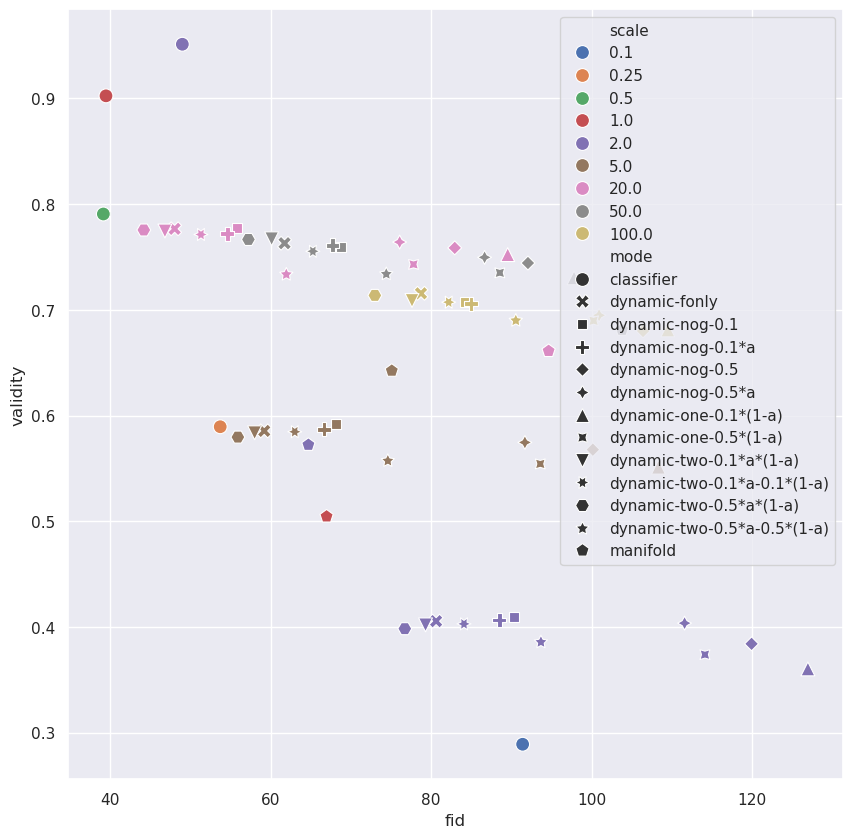

In [59]:
# data = avg.loc[avg['mode'] == 'manifold']
# data = data.loc[data['fid'] < 80]
data = avg
data['scale'] = data['scale'].map(lambda x: str(x))
plt.figure(figsize=(10,10), dpi=100)
sns.scatterplot(data=data, x='fid', y='validity', hue='scale', style='mode', s=100)

In [16]:
csv.loc[csv['mode'].isin(['manifold', 'dynamic-fonly'])].loc[csv['label'] == 1].sort_values(by=['mode', 'scale'])

,Name,mode,scale,label,validity,fid,sfid,is,precision,recall
102,guide_mode=dynamic-fonly+scale=2+label=1,dynamic-fonly,2.0,1,0.3813,77.318172,124.520638,5.586083,0.329590,0.615
25,guide_mode=dynamic-fonly+scale=5+label=1,dynamic-fonly,5.0,1,0.5913,51.794021,118.781807,4.395249,0.461426,0.558
4,guide_mode=dynamic-fonly+scale=20+label=1,dynamic-fonly,20.0,1,0.8174,41.016895,120.525200,3.403000,0.583984,0.443
28,guide_mode=dynamic-fonly+scale=50+label=1,dynamic-fonly,50.0,1,0.8403,53.079123,126.083413,3.457582,0.559082,0.384
65,guide_mode=dynamic-fonly+scale=100+label=1,dynamic-fonly,100.0,1,0.8120,64.265418,126.881540,3.983398,0.479492,0.442
15,guide_mode=manifold+scale=1+label=1,manifold,1.0,1,0.6523,48.452983,118.477048,4.190792,0.482422,0.559
5,guide_mode=manifold+scale=2+label=1,manifold,2.0,1,0.7583,41.127577,117.742019,3.625943,0.551270,0.517
8,guide_mode=manifold+scale=5+label=1,manifold,5.0,1,0.8374,43.015129,120.601504,3.541133,0.593750,0.453
56,guide_mode=manifold+scale=20+label=1,manifold,20.0,1,0.8164,61.726525,127.401138,3.763835,0.516113,0.423
110,guide_mode=manifold+scale=50+label=1,manifold,50.0,1,0.7456,78.389110,125.010881,4.274128,0.431152,0.379


In [11]:
csv = pd.read_csv("MNIST+all.csv")
avg = csv.groupby(['mode', 'scale', 'eta']).mean(['validity', 'fid', 'sfid', 'is', 'precision', 'recall']).reset_index()
avg

,mode,scale,eta,label,validity,fid,sfid,is,precision,recall
0,classifier,0.5,0,4.75,0.917600,14.369603,30.833868,1.659620,0.704956,0.767166
1,classifier,0.5,1,4.75,0.933975,9.291060,23.326696,1.662099,0.745972,0.777802
2,classifier,1.0,0,4.75,0.971800,24.039545,41.070706,1.586094,0.765625,0.614842
3,classifier,1.0,1,4.75,0.980850,11.069356,25.703138,1.581806,0.802856,0.706378
4,classifier,2.0,0,4.75,0.992075,44.536047,64.214186,1.566356,0.768677,0.388685
...,...,...,...,...,...,...,...,...,...,...
85,manifold,5.0,1,4.75,0.872550,18.929765,36.711526,1.763718,0.645264,0.797297
86,manifold,20.0,0,4.75,0.911000,36.178006,55.741484,1.767543,0.519043,0.733001
87,manifold,20.0,1,4.75,0.957175,16.789486,32.277287,1.659041,0.706787,0.768442
88,manifold,50.0,0,4.75,0.904925,55.189043,70.323107,1.868457,0.461670,0.719415


<Axes: xlabel='fid', ylabel='validity'>

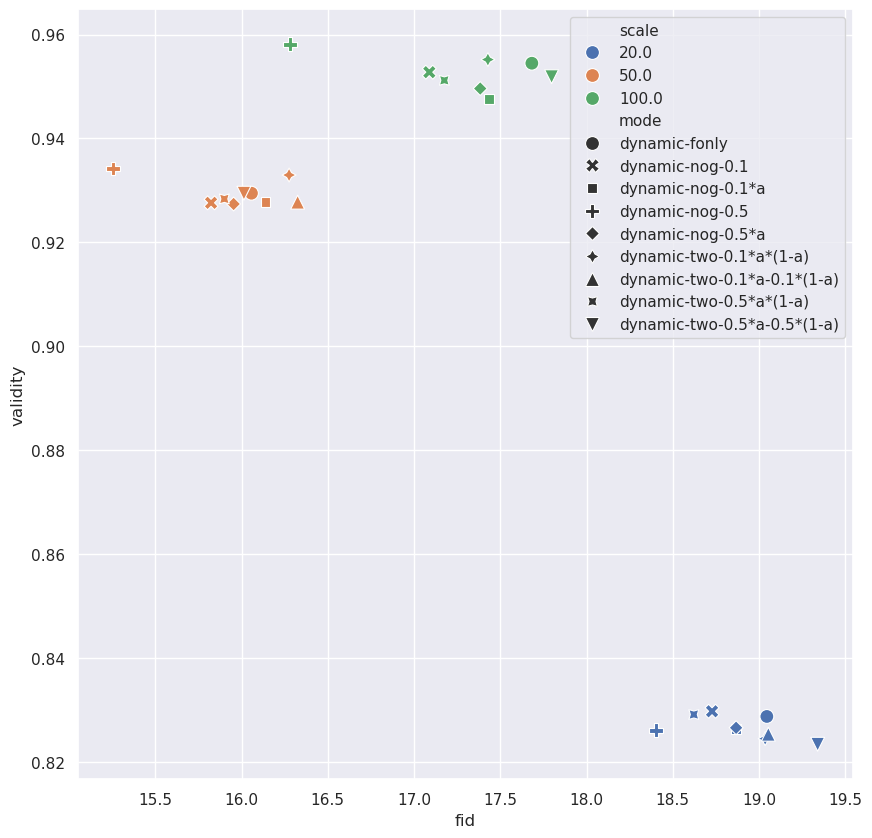

In [14]:
data = avg.loc[avg['mode'] != 'classifier']
data = data.loc[(data['mode'] == 'manifold') ^ (data['eta'] == 1)]
data = data.loc[data['fid'] < 20]
data['scale'] = data['scale'].map(lambda x: str(x))
plt.figure(figsize=(10,10), dpi=100)
sns.scatterplot(data=data, x='fid', y='validity', hue='scale', style='mode', s=100)